# **Representasi Text Game Honor of Kings**

Honor of Kings adalah sebuah game MOBA yang berbasis Android yang baru diluncurkan secara global. Kami disini dengan perkelompok diantaranya:
1. Dimas Fauzan
2. Hibatullah Naufal Ramadhan
3. Muhammad Ravi
4. Irfan Saputra Nasution

Akan melalukan representasi ulasan terhadap sebuah game Honor of Kings.

## **Crawling Data**

Kami akan melakukan Crawling Data dengan data cara Scrapping Play Store.

In [ ]:
# Melakukan Install Google Play Scrapper.
%pip install google-play-scraper

In [1]:
# Import Library untuk Scrapping Data   
from google_play_scraper import Sort, reviews_all
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Melakukan Proses Scrapping Data
scrapreview= reviews_all(
  'com.levelinfinite.sgameGlobal', #ID aplikasi
  lang='id', # pengubahan bahasa, defaults to ‘en’
  country='id', # pengubahan lokasi, defaults to ‘us’
  sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
  filter_score_with=None # defaults to None (means all score)
)

In [ ]:
# Melakukan Proses Print Scrapping Data
print(scrapreview)
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.to_csv('scrapping-data-hok.csv', index = None, header=True) # Melakukan Export Data menjadi Extention CSV

In [2]:
df = pd.read_csv('scrapping-data-hok.csv')
df.head(5) # Akan menampilkan 5 data teratas

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,36384958-3fba-4fb1-bf5a-27108bd3d8c4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Dari gw sendiri gamenya udh cukup bagus mulai ...,4,20,10.1.1.1,2024-10-10 20:33:41,NaN,NaN,10.1.1.1
1,dbf37950-88ff-4f03-b191-244cda31e216,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,[UPDATE] Sudah lancar kembali setelah update t...,5,102,10.1.1.1,2024-10-11 15:53:09,"Halo pemain\nJika jaringannya stabil, hal ini ...",2024-10-10 08:26:21,10.1.1.1
2,0995e9ab-939b-43cc-95be-1695329e0858,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Menurut pendapat saya game ini cukup bagus cum...,3,16,10.1.1.1,2024-10-10 11:55:13,"Hai pemain, \nTerima kasih atas saran Anda. Ka...",2024-10-10 16:17:08,10.1.1.1
3,4e7905b7-b1cb-4302-9a1f-54d29df8a513,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Suka suka deh. Makin update makin gede mb nya ...,4,3,10.1.1.1,2024-10-12 12:06:10,NaN,NaN,10.1.1.1
4,c60030f4-6f38-4c32-97bd-f25a8fdba1df,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Matchmaking lo Tencent diperbaiki dulu, itu ti...",1,18,10.1.1.1,2024-10-12 16:56:39,"Hai pemain,\nSistem mencoba untuk memasangkan ...",2024-10-12 17:23:49,10.1.1.1


In [3]:
# Jumlah Total Data
total_data = len(df)
print("Jumlah total data:", total_data)

Jumlah total data: 112500


## **Pemrosesan Data**
Karena kita melakukan scrapping data dan kita sudah menghubungkan dengan data csv. Kita akan melakukan pemrosesan data seperti pembersihan null, feature selection, pelabelan data dan lain-lain

In [4]:
# Pengecekan Duplicated
df.duplicated().sum()

0

In [5]:
# Pengecekan Data Null (Kosong)
df.isnull().sum()

reviewId                    0
userName                    0
userImage                   0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion    24094
at                          0
replyContent            93552
repliedAt               93552
appVersion              24094
dtype: int64

In [6]:
# Penghapusan Data Null (Kosong)
df = df.dropna()

# Pengecekan Ulang Data Null (Kosong)
df.isnull().sum()

reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
replyContent            0
repliedAt               0
appVersion              0
dtype: int64

In [7]:
# Feature Selection, karena kita akan berfokus pada content dan score saja.
feature_selection = ['content', 'score']
df = df.drop(columns=[col for col in df.columns if col not in feature_selection])
df.head()

,content,score
1,[UPDATE] Sudah lancar kembali setelah update t...,5
2,Menurut pendapat saya game ini cukup bagus cum...,3
4,"Matchmaking lo Tencent diperbaiki dulu, itu ti...",1
5,Kenapa sering suruh instal data yang di dalamn...,3
6,"segi Game play bagus, grafik.. Tapi team selal...",1


## **Visualisasi**

C:\Users\irfan\AppData\Local\Temp\ipykernel_39512\4000538223.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="score", data=df, palette="pastel")


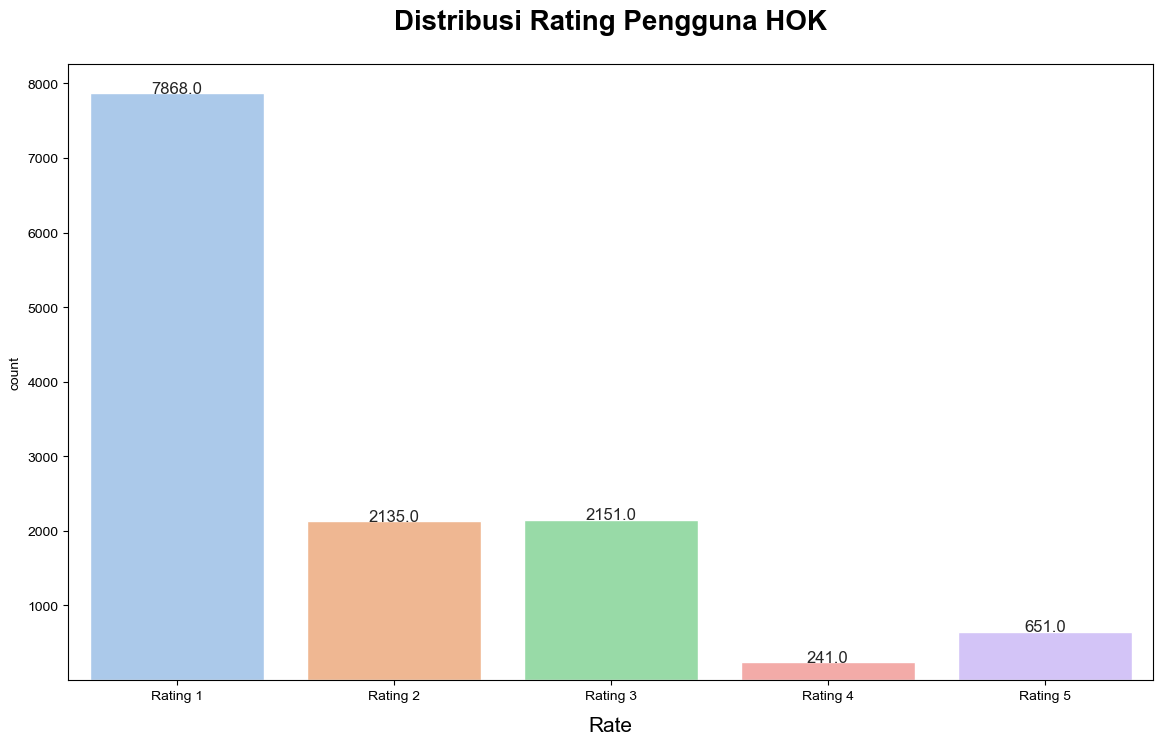

In [8]:
# visualisasi bar chart untuk melihat jumlah rating pengguna Sayurbox 
fig, ax = plt.subplots(figsize=(14,8))
position = (0,1,2,3,4)
labels = ("Rating 1","Rating 2","Rating 3","Rating 4","Rating 5")

ax = sns.set_style('whitegrid')
ax = sns.countplot(x="score", data=df, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,
             rect.get_height()+ 3.25,rect.get_height(),
             horizontalalignment='center', fontsize = 12)

plt.title('Distribusi Rating Pengguna HOK', fontsize=20, fontweight='bold', pad=25)
plt.xlabel('Rate', fontsize=15, labelpad=10)
plt.xticks(position, labels)
plt.ylim(1)
plt.show()

## **Pemrosesan Text**
Kita akan melakukan pemrosesan text seperti penghapusan numbers, pengubahan text menjadi kecil, dll

In [9]:
# Import Library untuk Pemrosesan Text hingga Representasi Text
import numpy as np
import nltk
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [10]:
# Install Sastrawi untuk stemming bahasa Indonesia
%pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


In [11]:
# Install NLTK
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [12]:
# Mengunduh NLTK Stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\irfan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# Tampilkan 10 record pertama dataset
print(df.to_string(index=True, max_rows=10))

                                                                                                                                                                                                                                                                                                                                                                                                                                               content  score
1                                                                                                                                        [UPDATE] Sudah lancar kembali setelah update terakhir sebesar 1MB, ternyata ada pengaruh juga. ____________________________________________ FPS drop, samapi 2 fps. Padahal jaringan stabil, test jaringan ping bagus, di game lain juga bagus. Ini bukan masalah jaringan, ini terjadi baru sekitar 1 minggu      5
2       Menurut pendapat saya game ini cukup bagus cuman ada beberapa keluh kesah saya yaitu: 1. Tampilan he

In [14]:
# Case Folding
def lowercase(review_text):
    low = review_text.lower()
    return low

df['clean_content'] = df['content'].apply(lambda low:lowercase(str(low)))
df.head()

,content,score,clean_content
1,[UPDATE] Sudah lancar kembali setelah update t...,5,[update] sudah lancar kembali setelah update t...
2,Menurut pendapat saya game ini cukup bagus cum...,3,menurut pendapat saya game ini cukup bagus cum...
4,"Matchmaking lo Tencent diperbaiki dulu, itu ti...",1,"matchmaking lo tencent diperbaiki dulu, itu ti..."
5,Kenapa sering suruh instal data yang di dalamn...,3,kenapa sering suruh instal data yang di dalamn...
6,"segi Game play bagus, grafik.. Tapi team selal...",1,"segi game play bagus, grafik.. tapi team selal..."


In [15]:
# Menghapus emoji menggunakan regex dan nilai unicode dari emoji

def remove_emoji(review_text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', review_text)

df['clean_content'] = df['clean_content'].apply(lambda emoji: remove_emoji(emoji))

In [16]:
# Remove Hastag
def remove_hashtag(review_text, default_replace=""):
    hashtag = re.sub(r'#\w+', default_replace, review_text)
    return hashtag

df['clean_content'] = df['clean_content'].apply(lambda hashtag: remove_hashtag(hashtag))

In [17]:
# Remove punctuation and number
def remove_number(review_text, default_replace=" "):
    num = re.sub(r'\d+', default_replace, review_text)
    return num

df['clean_content'] = df['clean_content'].apply(lambda num: remove_number(num))

In [18]:
# Remove tanda baca
def remove_punctuation(review_text, default_text=" "):
   list_punct = string.punctuation
   delete_punct = str.maketrans(list_punct,' '*len(list_punct))
   new_review = ' '.join(review_text.translate(delete_punct).split())
   return new_review

df['clean_content'] = df['clean_content'].apply(lambda punct: remove_punctuation(punct))

In [19]:
# Remove superskrip
def remove_superscript(review_text):
  number = re.compile("["u"\U00002070" 
                      u"\U000000B9"  
                      u"\U000000B2-\U000000B3"
                      u"\U00002074-\U00002079"
                      u"\U0000207A-\U0000207E"
                      u"U0000200D"
                      "]+", flags=re.UNICODE)
  return number.sub(r'', review_text)

df['clean_content'] = df['clean_content'].apply(lambda num: remove_superscript(num))

In [20]:
# Remove word repetition
def word_repetition(review_text):
  review = re.sub(r'(.)\1+', r'\1\1', review_text)
  return review

df['clean_content'] = df['clean_content'].apply(lambda word: word_repetition(word))

In [21]:
# Melakukan pembatasan kata berulang
def repetition(review_text):
  repeat = re.sub(r'\b(\w+)(?:\W\1\b)+', r'\1',review_text, flags=re.IGNORECASE)
  return repeat

df['clean_content'] = df['clean_content'].apply(lambda word: repetition(word))

In [31]:
# Menghapus Kata Spasi Berlebihan
def remove_extra_whitespaces(review_text):
  review = re.sub(r'\s+',' ', review_text)
  return review

df['clean_content'] = df['clean_content'].apply(lambda extra_spaces: remove_extra_whitespaces(extra_spaces))

In [23]:
# Menghapus Tidak Memiliki Arti
bannedword = ['uqjy', 'dehdje', 'jwdnmb', 'wxvlezuvws', 'ircel', 'swjjw', 'dmv',
         'dxrgz','qjtajuq','zzhwntdft','xywrfw' ,'fztnmdrrduy' ,'xsezuz', 
         'kbyv', 'iyyveyzqkdgm', 'arlrmdjy', 'sfarif', 'sfomar', 
         'syantienurxsayurbox', 'ghinaxsayurbox', 'nzxx', 'mtsco','wkwk',
         'wkwkw','wkwkwk','hihi','hihihii','hihihi','hehehe','hehehehe','hehe',
         'huhu','huhuu','ancok','guak','cokcok','hhmm','annya','huftt', 'mb', 'fps','ping','gb','keq',
         'op','dep', 'ksel','eh','gm','dicaprio∆']

re_banned_words = re.compile(r"\b(" + "|".join(bannedword) + ")\\W", re.I)

def RemoveBannedWords(toPrint):
    global re_banned_words
    return re_banned_words.sub("", toPrint)
  
df['clean_content'] = df['clean_content'].apply(lambda banned:RemoveBannedWords(banned))
df.head()

,content,score,clean_content
1,[UPDATE] Sudah lancar kembali setelah update t...,5,update sudah lancar kembali setelah update ter...
2,Menurut pendapat saya game ini cukup bagus cum...,3,menurut pendapat saya game ini cukup bagus cum...
4,"Matchmaking lo Tencent diperbaiki dulu, itu ti...",1,matchmaking lo tencent diperbaiki dulu itu tim...
5,Kenapa sering suruh instal data yang di dalamn...,3,kenapa sering suruh instal data yang di dalamn...
6,"segi Game play bagus, grafik.. Tapi team selal...",1,segi game play bagus grafik tapi team selalu d...


In [39]:
# Normalisasi Teks

# Load the slang dictionary
slang_df = pd.read_csv('colloquial-indonesian-lexicon.csv')
slang_dict = dict(zip(slang_df['slang'], slang_df['formal']))

# Function to translate slang to formal language using dictionary
def translate_slang(text):
    words = text.split()  # Split the text  into words
    translated_words = [slang_dict.get(word, word) for word in words]  # Translate each word if it's in the slang dictionary
    return ' '.join(translated_words)  # Join the translated words back into a single string

# Example usage: Apply translation to the DataFrame column
df['clean_content'] = df['clean_content'].apply(translate_slang)
print(df.to_string(index=True, max_rows=10))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                 content  score                                                                                                                                                                                                                                                                                                                                    clean_content
1                                                                                                                                                             [UPDATE] Sudah lancar kembali setelah bar

In [35]:
# Menghapus 3 kata
def remove_small_words(text):
  text = re.sub(r'\b\w{1,3}\b','',text)
  return text
df['clean_content'] = df['clean_content'].apply(lambda remove: remove_small_words(str(remove)))
df.head()

,content,score,clean_content
1,[UPDATE] Sudah lancar kembali setelah baru ter...,5,baru sudah lancar kembali setelah baru terakhi...
2,Menurut pendapat saya gim ini cukup bagus cuma...,3,menurut pendapat saya cukup bagus cuman beb...
4,"Matchmaking kamu Tencent diperbaiki dulu, itu ...",1,pertandingan kamu tencent diperbaiki dulu mu...
5,Kenapa sering suruh instal data yang di dalamn...,3,kenapa sering suruh unduh data yang dalamnya ...
6,"segi Game play bagus, grafik.. Tapi tim selalu...",1,segi play bagus grafik tapi selalu dapat dar...


In [37]:
# Melakukan Stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['clean_content'] = df['clean_content'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
print(df.to_string(index=True, max_rows=10))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                 content  score                                                                                                                                                                                                                                                                                                                                    clean_content
1                                                                                                                                                             [UPDATE] Sudah lancar kembali setelah bar

## **TF-IDF (Term Frequency-Inverse Document Frequency)**

Ditahap akhir dari text preprocessing adalah term-weighting .Term-weighting merupakan proses pemberian bobot term pada dokumen. Pembobotan ini digunakan nantinya oleh algoritma Machine Learning untuk klasifikasi dokumen. Ada beberapa metode yang dapat digunakan, salah satunya adalah TF-IDF (Term Frequency-Inverse Document Frequency).

In [40]:
# Melakukan Import TF-IDF Vectorize
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
from nltk.tokenize import word_tokenize

# Download tokenizer jika belum tersedia
nltk.download('punkt')

# Terapkan tokenisasi pada setiap entri di kolom 'content'
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['tokens'] = df['clean_content'].apply(word_tokenize_wrapper)

# Tampilkan hasil tokenisasi
print(df[['tokens']])  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\irfan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                   tokens
1       [baru, sudah, lancar, kembali, telah, baru, ak...
2       [turut, dapat, saya, cukup, bagus, cuman, bebe...
4       [tanding, kamu, tencent, baik, dulu, musuh, ka...
5       [kenapa, sering, suruh, unduh, data, yang, dal...
6       [segi, main, bagus, grafik, tapi, selalu, dapa...
...                                                   ...
109340                                            [bagus]
109693                                            [bagus]
110424                                             [seru]
110802                                            [abang]
110909                                    [moonton, malu]

[13046 rows x 1 columns]


In [42]:
# Fungsi untuk menggabungkan list token menjadi string
def join_text_list(tokens):
    # Pastikan tokens adalah list
    if isinstance(tokens, list):
        return ' '.join(tokens)
    return ''

# Mengaplikasikan fungsi ke kolom 'tokens'
df["list"] = df["tokens"].apply(join_text_list)
print(df["list"])

1         baru sudah lancar kembali telah baru akhir bes...
2         turut dapat saya cukup bagus cuman beberapa ke...
4         tanding kamu tencent baik dulu musuh kasih yan...
5         kenapa sering suruh unduh data yang dalam teru...
6         segi main bagus grafik tapi selalu dapat dark ...
                                ...                        
109340                                                bagus
109693                                                bagus
110424                                                 seru
110802                                                abang
110909                                         moonton malu
Name: list, Length: 13046, dtype: object


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

# banyaknya term yang akan digunakan, 
# di pilih berdasarkan top max_features 
# yang diurutkan berdasarkan term frequency seluruh corpus
max_features = 1000

# Feature Engineering 
print ("------- TF-IDF on Data -------")

tf_idf = TfidfVectorizer(max_features=max_features, binary=True)
tfidf_mat = tf_idf.fit_transform(df["list"]).toarray()

print("TF-IDF ", type(tfidf_mat), tfidf_mat.shape)

------- TF-IDF on Data -------
TF-IDF  <class 'numpy.ndarray'> (13046, 1000)


In [44]:
terms = tf_idf.get_feature_names_out()

# sum tfidf frequency of each term through documents
sums = tfidf_mat.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
920,tidak,715.331322
518,main,520.428245
67,bagus,493.846953
997,yang,426.841910
125,bisa,413.758372
...,...,...
757,roamer,4.849126
442,komentar,4.769202
255,fighter,4.652941
70,bahwa,4.485495


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 1000

# calc TF vector
cvect = CountVectorizer(max_features=max_features)
TF_vector = cvect.fit_transform(df["list"])

# normalize TF vector
normalized_TF_vector = normalize(TF_vector, norm='l1', axis=1)

# calc IDF
tfidf = TfidfVectorizer(max_features=max_features, smooth_idf=False)
tfs = tfidf.fit_transform(df["list"])
IDF_vector = tfidf.idf_

# hitung TF x IDF sehingga dihasilkan TFIDF matrix / vector
tfidf_mat = normalized_TF_vector.multiply(IDF_vector).toarray()

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize
import pandas as pd

# Assuming df is already defined with 'list' and 'tokens' columns.
# Example setup for df (remove if df is already loaded):
# df = pd.DataFrame({
#     "list": ["sample text one", "another example text", "more text data"],
#     "tokens": [["sample", "text", "one"], ["another", "example", "text"], ["more", "text", "data"]]
# })

max_features = 1000

def generate_tfidf_mat(min_gram, max_gram):
    cvect = CountVectorizer(max_features=max_features, ngram_range=(min_gram, max_gram))
    counts = cvect.fit_transform(df["list"])

    normalized_counts = normalize(counts, norm='l1', axis=1)

    tfidf = TfidfVectorizer(max_features=max_features, ngram_range=(min_gram, max_gram), smooth_idf=False)
    tfs = tfidf.fit_transform(df["list"])

    tfidf_mat = normalized_counts.multiply(tfidf.idf_).toarray()
    
    TF = normalized_counts.toarray()
    IDF = tfidf.idf_
    TF_IDF = tfidf_mat
    return TF, IDF, TF_IDF, tfidf.get_feature_names_out()

# Generate matrices for unigrams, bigrams, and trigrams
tf_mat_unigram, idf_mat_unigram, tfidf_mat_unigram, terms_unigram = generate_tfidf_mat(1, 1)
tf_mat_bigram, idf_mat_bigram, tfidf_mat_bigram, terms_bigram = generate_tfidf_mat(2, 2)
tf_mat_trigram, idf_mat_trigram, tfidf_mat_trigram, terms_trigram = generate_tfidf_mat(3, 3)

# Verify the presence of 'tokens' column and index resetting if necessary
if 'tokens' in df.columns:
    df = df.reset_index(drop=True)
else:
    print("Column 'tokens' does not exist in the DataFrame.")
    # Exit or raise an error if necessary

# Specify the sample index to view the TF-IDF for
idx_sample = 0

# Check if idx_sample is within the range of the DataFrame
if idx_sample < len(df):
    print(f"Show TFIDF sample at index {idx_sample}:\n")
    print(df["tokens"][idx_sample], "\n")

    print("\t\t\t", "TF", "\t\t", "IDF", "\t\t", "TF-IDF", "\t", "Term\n")
    for i, item in enumerate(zip(tf_mat_unigram[idx_sample], idf_mat_unigram, tfidf_mat_unigram[idx_sample], terms_unigram)):
        if item[2] != 0.0:
            print(
                f"Array position {i}\t",
                f"{item[0]:.6f}\t",
                f"{item[1]:.6f}\t",
                f"{item[2]:.6f}\t",
                item[3]
            )
else:
    print(f"Index {idx_sample} is out of bounds for the DataFrame.")

Show TFIDF sample at index 0:

['baru', 'sudah', 'lancar', 'kembali', 'telah', 'baru', 'akhir', 'besar', 'nyata', 'pengaruh', 'juga', 'drop', 'sampai', 'padahal', 'jaring', 'stabil', 'test', 'jaring', 'bagus', 'lain', 'juga', 'bagus', 'bukan', 'masalah', 'jaring', 'jadi', 'baru', 'sekitar', 'minggu'] 

			 TF 		 IDF 		 TF-IDF 	 Term

Array position 14	 0.035714	 5.672216	 0.202579	 akhir
Array position 70	 0.071429	 2.840933	 0.202924	 bagus
Array position 86	 0.107143	 3.304580	 0.354062	 baru
Array position 116	 0.035714	 5.803408	 0.207265	 besar
Array position 143	 0.035714	 4.950784	 0.176814	 bukan
Array position 226	 0.035714	 5.401063	 0.192895	 drop
Array position 350	 0.035714	 3.306117	 0.118076	 jadi
Array position 355	 0.107143	 3.558531	 0.381271	 jaring
Array position 370	 0.071429	 3.703156	 0.264511	 juga
Array position 407	 0.035714	 5.527477	 0.197410	 kembali
Array position 461	 0.035714	 4.310819	 0.153958	 lain
Array position 467	 0.035714	 4.391737	 0.156848	 lan

## Word2Vec

In [50]:
%pip install gensim

In [51]:
from gensim.models import Word2Vec

# Menentukan parameter model
num_features = 300    # Dimensi vektor kata
min_word_count = 40   # Jumlah kata minimal
num_workers = 4       # Jumlah thread paralel
context = 10          # Ukuran jendela konteks
downsampling = 1e-3   # Downsample setting untuk kata seringch

# Membuat model Word2Vec
model = Word2Vec(
    sentences=df['tokens'],
    vector_size=num_features,
    workers=num_workers,
    min_count=min_word_count,
    window=context,
    sample=downsampling
)

# Untuk menghemat memori
model.init_sims(replace=True)

# Menyimpan model
model_name = "word2vec_model"
model.save(model_name)

C:\Users\irfan\AppData\Local\Temp\ipykernel_39512\3396566640.py:21: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)


In [52]:
# Daftar kata yang ingin diuji
words = ["gim", "pertandingan", "pahlawan", "saya", "kamu"]

# Filter kata-kata yang ada di dalam vocabulary model
filtered_words = [word for word in words if word in model.wv.key_to_index]

# Mengecek apakah filtered_words tidak kosong
if filtered_words:
    # Menjalankan doesnt_match pada kata yang ada di dalam vocabulary
    try:
        odd_word = model.wv.doesnt_match(filtered_words)
        print("Kata yang tidak sesuai di antara mereka adalah:", odd_word)
    except ValueError as e:
        print("Error:", e)
else:
    print("Tidak ada kata yang ditemukan dalam vocabulary.")

Kata yang tidak sesuai di antara mereka adalah: pahlawan


In [53]:
# Ini akan mencetak kata-kata yang paling mirip yang ada dalam model
model.wv.most_similar("bagus")  

[('gamenya', 0.8891186118125916),
 ('masih', 0.8827740550041199),
 ('grafik', 0.8787700533866882),
 ('tapi', 0.8405734896659851),
 ('lumayan', 0.8349968194961548),
 ('sayang', 0.8277934193611145),
 ('suka', 0.8147133588790894),
 ('gameplay', 0.7977315783500671),
 ('seru', 0.7936983108520508),
 ('nunda', 0.7917832136154175)]

In [54]:
# Mendapatkan jumlah total kata dalam vocabulary
vocab_size = len(model.wv.key_to_index)
print("Jumlah kata dalam vocabulary:", vocab_size)

# Mendapatkan bentuk vektor kata
vector_shape = model.wv.vectors.shape
print("Bentuk vektor kata:", vector_shape)

Jumlah kata dalam vocabulary: 595
Bentuk vektor kata: (595, 300)


In [55]:
model.wv['saya']

array([ 0.1370939 , -0.0344228 , -0.01098497, -0.02216992,  0.0530067 ,
       -0.03267761, -0.04683815, -0.04309231,  0.02261326,  0.00481272,
       -0.01381231, -0.06139622,  0.0438902 ,  0.11735213, -0.05155288,
        0.04481831,  0.08531905,  0.07875542,  0.08809235, -0.00786119,
        0.05486178, -0.09690803,  0.00981376,  0.03922327,  0.07698943,
        0.03879714, -0.00381297, -0.08639868, -0.00789151, -0.06373165,
        0.06346378, -0.00199194,  0.05323394,  0.10154243,  0.01639533,
       -0.01470395, -0.10640799, -0.00029169, -0.11670841, -0.08590526,
       -0.13239506,  0.02458027, -0.04880298,  0.05935536,  0.04435483,
        0.10352259, -0.02989381, -0.01277725,  0.0117782 ,  0.02544906,
       -0.00269139, -0.02446142, -0.01723587,  0.06973655, -0.04219672,
        0.04696313, -0.07577752, -0.00871379, -0.03889961, -0.06430453,
       -0.01901717, -0.02032381, -0.01174718,  0.03132771,  0.00928388,
        0.03598304,  0.07422423, -0.10544254, -0.03744044, -0.05